## Introduction

We are going to analyse and predict the data of the hourly vehicle counts of particular highway in the year of 1995 beginning from the month of August.

#### Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Read the data as an hourly Time Series from the '.csv' file and plot the Time Series data.

In [2]:
df = pd.read_csv("Vehicle.csv")
df

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193
...,...,...
1684,1685,194
1685,1686,373
1686,1687,1218
1687,1688,4076


In [3]:
# Creating a timestamp for the data

date = pd.date_range(start='8/1/1995',freq='H',periods=1689)
date

DatetimeIndex(['1995-08-01 00:00:00', '1995-08-01 01:00:00',
               '1995-08-01 02:00:00', '1995-08-01 03:00:00',
               '1995-08-01 04:00:00', '1995-08-01 05:00:00',
               '1995-08-01 06:00:00', '1995-08-01 07:00:00',
               '1995-08-01 08:00:00', '1995-08-01 09:00:00',
               ...
               '1995-10-09 23:00:00', '1995-10-10 00:00:00',
               '1995-10-10 01:00:00', '1995-10-10 02:00:00',
               '1995-10-10 03:00:00', '1995-10-10 04:00:00',
               '1995-10-10 05:00:00', '1995-10-10 06:00:00',
               '1995-10-10 07:00:00', '1995-10-10 08:00:00'],
              dtype='datetime64[ns]', length=1689, freq='H')

In [4]:
df['Time_Stamp'] = pd.to_datetime(date)
df.head()

,Hour,Vehicles,Time_Stamp
0,1,699,1995-08-01 00:00:00
1,2,346,1995-08-01 01:00:00
2,3,193,1995-08-01 02:00:00
3,4,191,1995-08-01 03:00:00
4,5,193,1995-08-01 04:00:00


In [5]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,Hour,Vehicles
Time_Stamp,,
1995-08-01 00:00:00,1,699
1995-08-01 01:00:00,2,346
1995-08-01 02:00:00,3,193
1995-08-01 03:00:00,4,191
1995-08-01 04:00:00,5,193


In [6]:
df.drop(labels='Hour', axis=1, inplace=True)
df.head()

,Vehicles
Time_Stamp,
1995-08-01 00:00:00,699
1995-08-01 01:00:00,346
1995-08-01 02:00:00,193
1995-08-01 03:00:00,191
1995-08-01 04:00:00,193


## Ploting the Time Series

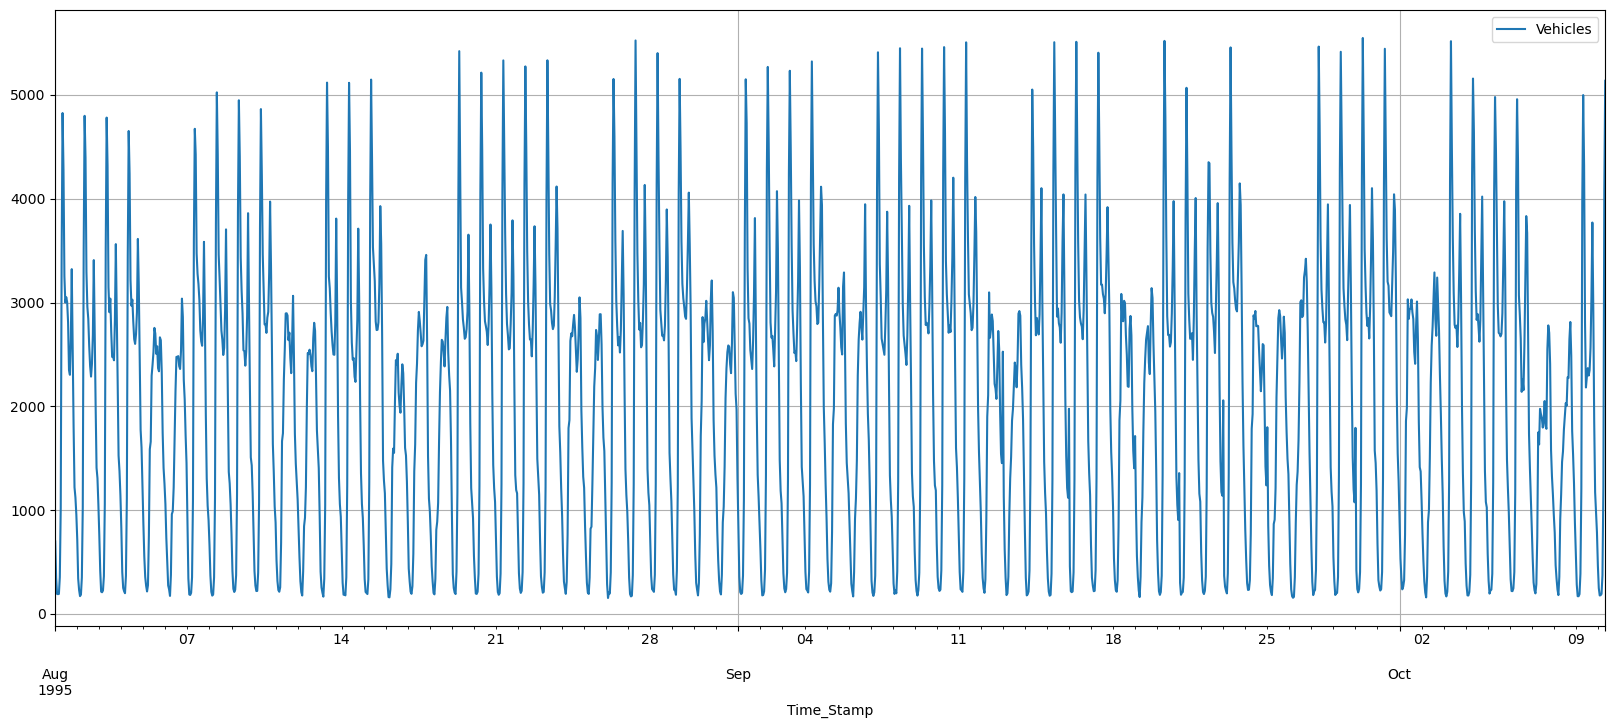

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
df.plot()
plt.grid();

## Descriptive statistics of the Time Series

In [14]:
df.describe()

,Vehicles
count,1689.000000
mean,2060.417999
std,1339.545842
min,154.000000
25%,851.000000
50%,2262.000000
75%,2924.000000
max,5549.000000


In [15]:
print('We have around',1689/24,'days of data.')

We have around 70.375 days of data.


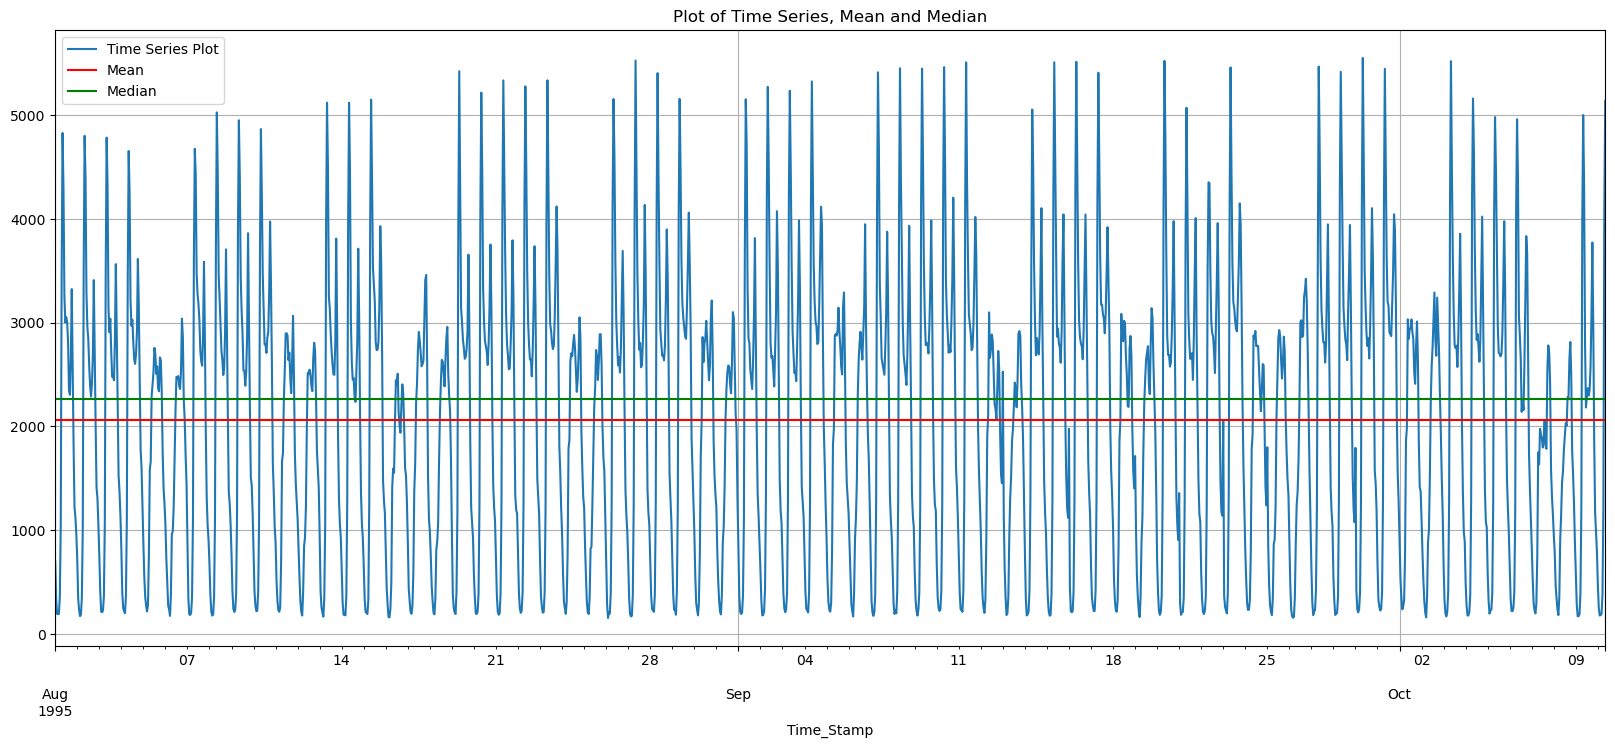

In [19]:
df.plot()
plt.axhline(df['Vehicles'].mean(),color='Red')
plt.axhline(df['Vehicles'].median(),color='Green')
plt.title('Plot of Time Series, Mean and Median')
plt.legend(['Time Series Plot','Mean','Median'])
plt.grid()
plt.show()

## Decomposing the Time Series to understand the various components.

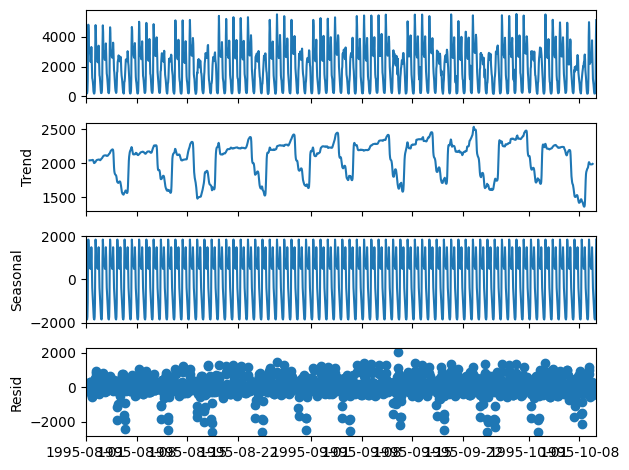

In [11]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

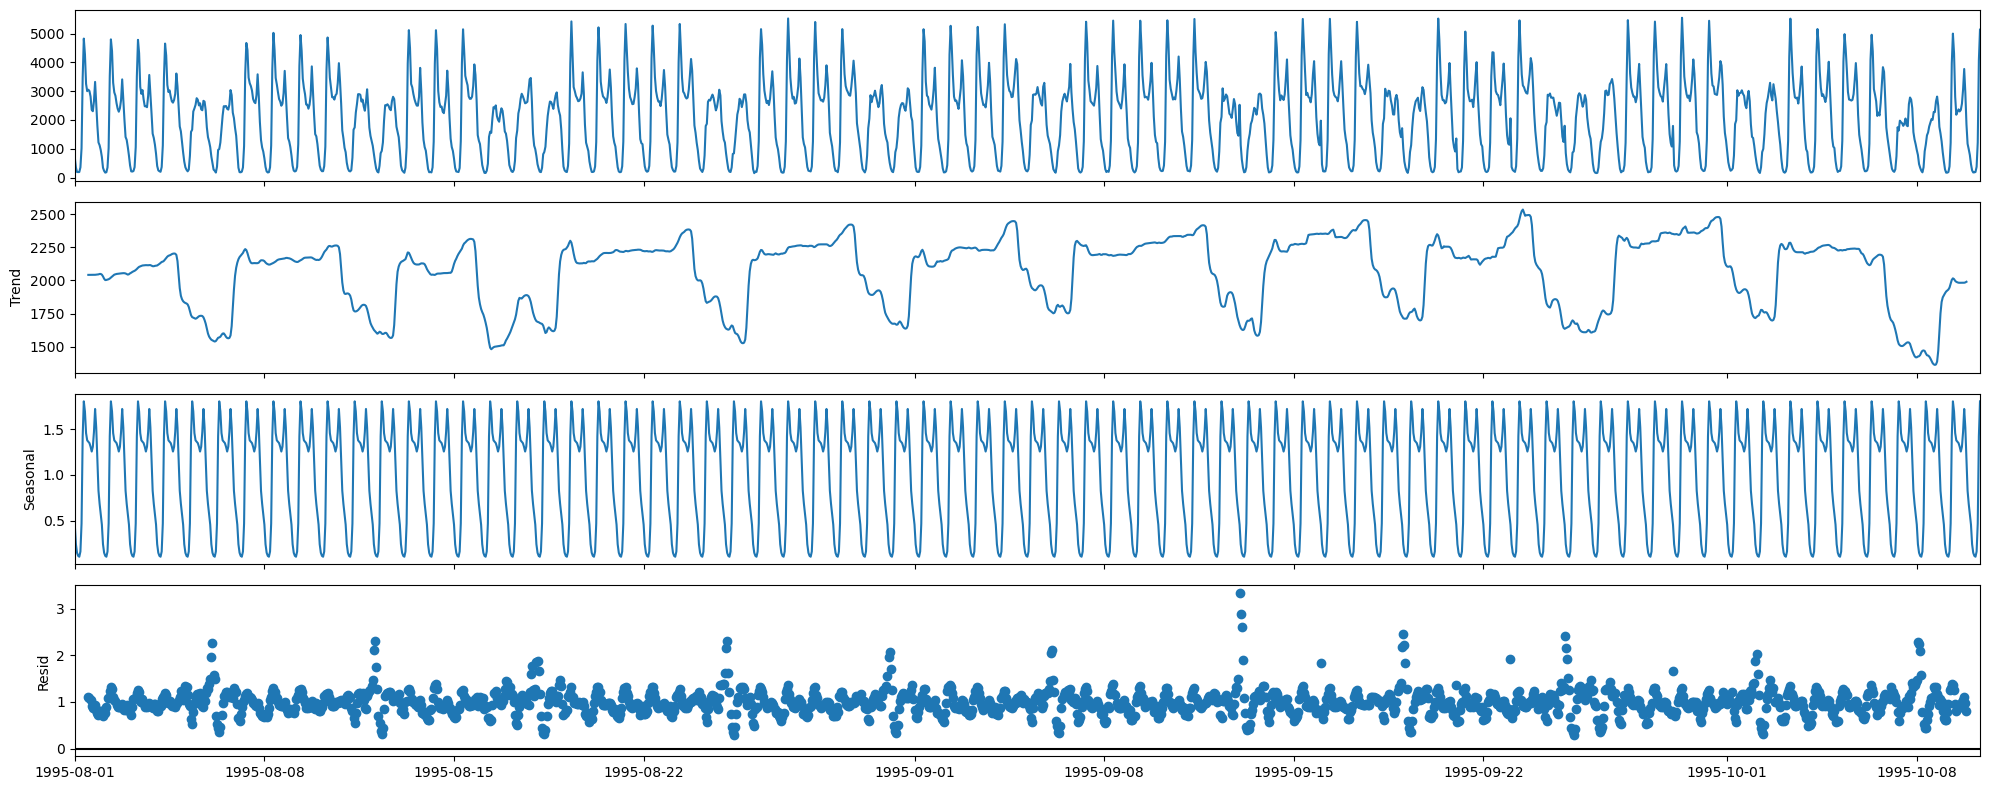

In [22]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

## Split the data into train and test

In [23]:
train = df[0:int(len(df)*0.7)] 
test = df[int(len(df)*0.7):]

print(train.shape)
print(test.shape)

(1182, 1)
(507, 1)


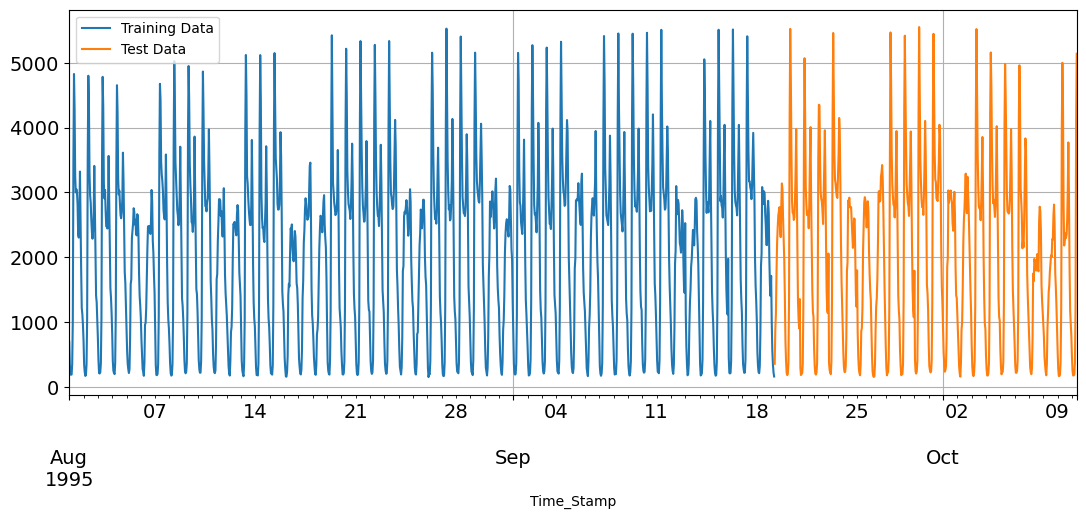

In [24]:
train['Vehicles'].plot(figsize=(13,5), fontsize=14)
test['Vehicles'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model 1: Linear Regression

In [25]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1183 for i in range(len(test))]

In [26]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [27]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [28]:
LinearRegression_train.head()

,Vehicles,time
Time_Stamp,,
1995-08-01 00:00:00,699,1
1995-08-01 01:00:00,346,2
1995-08-01 02:00:00,193,3
1995-08-01 03:00:00,191,4
1995-08-01 04:00:00,193,5


In [29]:
LinearRegression_test.head()

,Vehicles,time
Time_Stamp,,
1995-09-19 06:00:00,359,1183
1995-09-19 07:00:00,886,1184
1995-09-19 08:00:00,1125,1185
1995-09-19 09:00:00,1753,1186
1995-09-19 10:00:00,2224,1187


In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Vehicles'].values)
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

## Model Evaluation

In [31]:
from sklearn import metrics

rmse_model1_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1362.674


## Model 2: Simple Exponential Smoothing Model

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Vehicles'])
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
rmse_model2_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2322.774


## Model 3: Double Exponential Smoothing Model

In [36]:
DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train['Vehicles'])
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
rmse_model3_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 20198.794


## Model 4: Build a Triple Exponential Smoothing Model

In [37]:
TES_train = train.copy()
TES_test = test.copy()

model_TES = ExponentialSmoothing(SES_train['Vehicles'],trend='additive',seasonal='multiplicative')
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
rmse_model4_test = metrics.mean_squared_error(test['Vehicles'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1391.370


In [ ]:
# Out of all the models, Regression is performing the best

## Model 5: Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01]

In [41]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
alpha = []
rmse = []

for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Vehicles'],SES_test['predict',i],squared=False)

    alpha.append(i)
    rmse.append(rmse_model2_test_i)
    
resultsDf_model['Alpha Values'] = alpha
resultsDf_model['Test RMSE'] = rmse    
resultsDf_model

,Alpha Values,Test RMSE
0,0.01,1351.375229
1,0.02,1350.523209
2,0.03,1354.426401
3,0.04,1364.089357
4,0.05,1378.518123
...,...,...
94,0.95,2320.188858
95,0.96,2320.805848
96,0.97,2321.397448
97,0.98,2321.965005


In [43]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).head(1)

,Alpha Values,Test RMSE
1,0.02,1350.523209


## Model 6: Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01]

In [47]:
DES_train = train.copy()
DES_test = test.copy()

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
alpha = []
beta = []
rmse = []
model_DES = Holt(DES_train['Vehicles'])
for i in np.arange(0.01,1,0.05):
    for j in np.arange(0.01,1,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Vehicles'],DES_test['predict',i,j],squared=False)
        
        alpha.append(i)
        beta.append(j)
        rmse.append(rmse_model4_test)

resultsDf_model['Alpha Values'] = alpha
resultsDf_model['Beta Values'] = beta
resultsDf_model['Test RMSE'] = rmse    
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.01,0.01,1389.929814
1,0.01,0.06,1359.268852
2,0.01,0.11,3897.874002
3,0.01,0.16,13160.809527
4,0.01,0.21,13544.853864
...,...,...,...
395,0.96,0.76,26454.295317
396,0.96,0.81,24384.095356
397,0.96,0.86,22693.686974
398,0.96,0.91,21358.601473


In [48]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).head(1)

,Alpha Values,Beta Values,Test RMSE
1,0.01,0.06,1359.268852


## Model 7: Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1]

In [49]:
TES_train = train.copy()
TES_test = test.copy()

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
alpha = []
beta = []
gamma = []
rmse = []

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Vehicles'],TES_test['predict',i,j,k],squared=False)

            alpha.append(i)
            beta.append(j)
            gamma.append(k)
            rmse.append(rmse_model4_test)

resultsDf_model['Alpha Values'] = alpha
resultsDf_model['Beta Values'] = beta
resultsDf_model['Gamma Values'] = gamma
resultsDf_model['Test RMSE'] = rmse    
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.1,0.1,0.1,20333.708228
1,0.1,0.1,0.2,20333.708228
2,0.1,0.1,0.3,20333.708228
3,0.1,0.1,0.4,20333.708228
4,0.1,0.1,0.5,20333.708228
...,...,...,...,...
995,1.0,1.0,0.6,20333.708228
996,1.0,1.0,0.7,20333.708228
997,1.0,1.0,0.8,20333.708228
998,1.0,1.0,0.9,20333.708228


In [50]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).head(1)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.1,0.1,0.1,20333.708228


In [ ]:
# Simple Exponential Smoothing model by taking the alpha value as 0.02 is the best performing model with RMSE 1350.